In [1]:
#importing required libraries
import numpy as np #for numerical computation
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualzaton
import warnings #to supress warnings
warnings.filterwarnings('ignore')

In [2]:
#set max columns display limit
pd.set_option("display.max_columns", 40)
#to supress scientific notation
pd.set_option('display.float_format', '{:.3f}'.format)
#set style for graph
sns.set_style(style='darkgrid')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#reading dataset 

path1 = '/content/drive/MyDrive/data/applicant.csv'
applicant_df = pd.read_csv(path1)

path2 = '/content/drive/MyDrive/data/loan.csv'
loan_df = pd.read_csv(path2)

In [5]:
applicant_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [6]:
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


We have two dataset applicant dataset is related to personal detail of the applicant and second dataset is related to specific loan details of applicants.

In both dataset we have one common column (applicant_id) to connect two dataframe in order to have all the data of the applicant in one dataframe to analyze



In [7]:
#checking information
applicant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In applicant dataset we have 1000 rows and 15 columns.

In 6 columns we have null values we have to find a way to handle null values.

In [8]:
#checking information
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

In loan datset we have 1000 rows and 13 columns.

Here we have null values in 3 columns.

# Merging two dataframe and then I will start our exploratory data analysis.

In [9]:
#using inner join to merge dataset so that we have only matching rows from both dataset.
final_df = applicant_df.merge(loan_df, how = 'inner', on = 'applicant_id' )

In [10]:
#first look on final_df
final_df.head()  


,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [11]:
#checking shape of the dataset
final_df.shape

(1000, 27)

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas



*   We have two unique id columns(applicant_id, loan_application_id) in our dataset which is only for identify each row uniquely and not important for finding any insight, we are dropping them.



In [13]:
#checking descriptive statistics 
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,1000.000,1514763.121,228676.373,1105364.000,1321398.000,1529114.500,1707751.750,1903505.000
Primary_applicant_age_in_years,1000.000,35.546,11.375,19.000,27.000,33.000,42.000,75.000
Number_of_dependents,1000.000,1.155,0.362,1.000,1.000,1.000,1.000,2.000
Years_at_current_residence,1000.000,2.845,1.104,1.000,2.000,3.000,4.000,4.000
Foreign_worker,1000.000,0.963,0.189,0.000,1.000,1.000,1.000,1.000
Months_loan_taken_for,1000.000,20.903,12.059,4.000,12.000,18.000,24.000,72.000
Principal_loan_amount,1000.000,3271258.000,2822736.876,250000.000,1365500.000,2319500.000,3972250.000,18424000.000
EMI_rate_in_percentage_of_disposable_income,1000.000,2.973,1.119,1.000,2.000,3.000,4.000,4.000
Has_coapplicant,1000.000,0.041,0.198,0.000,0.000,0.000,0.000,1.000
Has_guarantor,1000.000,0.052,0.222,0.000,0.000,0.000,0.000,1.000



1. We have age ranges from 19 to 75 years.
2. Number of dependents are either 1 or 2.

3. Years_at_current_residence is ranges from 1 to 4 years.

4. Months_loan_taken_for ranges from 4 to 72 months.

5. Principal_loan_amount ranges from 250000 to 18424000.


In [14]:
#droping unique id columns
final_df.drop(columns=['applicant_id','loan_application_id'],inplace=True)

# Data Cleaning 

In [15]:
#checking columns with null values
final_df.isnull().sum().sort_values(ascending=False)[:10]

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Property                                                    154
Has_been_employed_for_at_least                               62
Purpose                                                      12
Loan_history                                                  0
dtype: int64

1. As we can see above there are 9 columns, Where we have null values.

2. In columns we have null values near 50% or more than 50 %.

3. This much null values can affect our prediction drastically either we can drop them directly or find a better way of replacing them.

4. We will handle null values in each column one by one.

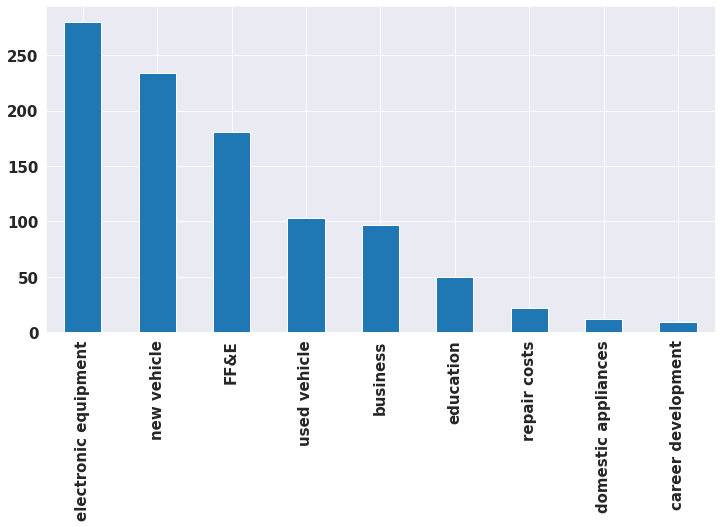

In [16]:
#checking value count in Purpose columns
plt.figure(figsize=(12,6))
final_df['Purpose'].value_counts().plot(kind='bar');

As purpose column in categorical we can replace null values by the most frequent value in column (mode).

In [17]:
#replacing null values with mode
final_df['Purpose'].fillna(final_df['Purpose'].mode()[0],inplace=True)

In [18]:
#checking Has_been_employed_for_at_least column value count
final_df['Has_been_employed_for_at_least'].value_counts()

1 year     339
7 years    253
4 years    174
0 year     172
Name: Has_been_employed_for_at_least, dtype: int64

In [19]:
#checking Has_been_employed_for_at_most column value count
final_df['Has_been_employed_for_at_most'].value_counts()

4 years    339
7 years    174
1 year     172
0 year      62
Name: Has_been_employed_for_at_most, dtype: int64

1. From above two results, we can see that min and max for employed column is 0 and 7 years.

2. We will replace null values in 'Has_been_employed_for_at_least' column with 0 year not with mode because their might be a case that least value will be greater than max value if we replace with mode, As we can see their are some values in Has_been_employed_for_at_most column is 0 year.

In [20]:
#replacing null values with 0 year
final_df['Has_been_employed_for_at_least'].fillna('0 year', inplace=True)

In [21]:
#checking property column value count
final_df['Property'].value_counts()

car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

Property column is categorical column and we will replace null values with mode of column which also make sense as most frequent value is 'car or other'

In [22]:
#replacing null values with mode
final_df['Property'].fillna(final_df['Property'].mode()[0],inplace=True)

In [23]:
#checking saving account balance
final_df['Savings_account_balance'].value_counts()

Low          603
Medium       103
High          63
Very high     48
Name: Savings_account_balance, dtype: int64

Savings_account_balance column is categorical column and we will replace null values with mode of column which is low and also it is more than in 60% of the case in dataset

In [24]:
#replacing null values with mode
final_df['Savings_account_balance'].fillna(final_df['Savings_account_balance'].mode()[0],inplace=True)

In [25]:
#checking Has_been_employed_for_at_most column
final_df['Has_been_employed_for_at_most'].value_counts()

4 years    339
7 years    174
1 year     172
0 year      62
Name: Has_been_employed_for_at_most, dtype: int64

Has_been_employed_for_at_most is categorical column we can replace null values by mode of the column but in Has_been_employed_for_at_least column there are some values which is '7 year' and their might be a issue if we replace with mode is that least will be greater than most year employed for that reason, we will replace null values with '7 years' value which is maximum value.

In [26]:
#replacing null values 
final_df['Has_been_employed_for_at_most'].fillna('7 years',inplace=True)

In [27]:
#checking Has_been_employed_for_at_most column
final_df['Has_been_employed_for_at_most'].value_counts()

7 years    427
4 years    339
1 year     172
0 year      62
Name: Has_been_employed_for_at_most, dtype: int64

In [28]:
#now checking if their is any case where Has_been_employed_for_at_most < Has_been_employed_for_at_least
final_df[final_df['Has_been_employed_for_at_least']> final_df['Has_been_employed_for_at_most']]

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant


As we can see their is no such rows where least employed experience is greater than most employed experience.

In [29]:
#checking Balance_in_existing_bank_account_(lower_limit_of_bucket) column
final_df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].value_counts()

0        269
2 lac     63
Name: Balance_in_existing_bank_account_(lower_limit_of_bucket), dtype: int64

In [30]:
#checking Balance_in_existing_bank_account_(upper_limit_of_bucket) column
final_df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].value_counts()

0        274
2 lac    269
Name: Balance_in_existing_bank_account_(upper_limit_of_bucket), dtype: int64

1. Balance_in_existing_bank_account_(lower_limit_of_bucket) and Balance_in_existing_bank_account_(upper_limit_of_bucket) columns has only two value either 0 or 2 lac.

2. Columns are categorical columns as well have null values near 50% or more than 50 % so we are dropping them

In [31]:
#checking Telephone column
final_df['Telephone'].value_counts()

Registered under the applicant's name    404
Name: Telephone, dtype: int64

In Telephone column we have only one value Registered under the applicant's name so we can drop column as it will be unique for each row.

In [32]:
#checking Other_EMI_plans column
final_df['Other_EMI_plans'].value_counts()

bank      139
stores     47
Name: Other_EMI_plans, dtype: int64

1. Their are only two categories in 'Other_EMI_plans' columns and have null value more than 80%.

2. If we replace this much null value with either of the values that can affectedd our result drastically, so we can drop them.

# Dropping columns which have null values near 50% or more than 50%

In [33]:
#dropping columns having null values more than 50%
final_df.drop(columns=['Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)',
             'Telephone','Other_EMI_plans'],inplace=True)

In [34]:
#rechecking if their are still any null values available 
final_df.isnull().sum().sort_values(ascending=False)[:2]

Primary_applicant_age_in_years    0
Months_loan_taken_for             0
dtype: int64

Now we have handle null values in our dataset, let's check for any duplicate row in dataset.

In [35]:
#checking duplicat rows
final_df.duplicated().value_counts()

False    1000
dtype: int64

Their are no duplicate row in our datset

# **Exploratory Data Analysis**

# Analysis of categorical features

In [36]:
#check  categorical columns
categorical_columns = final_df.select_dtypes(include=['object'])
categorical_columns.head()

,Gender,Marital_status,Housing,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Savings_account_balance,Purpose,Property,Loan_history
0,male,single,own,skilled employee / official,7 years,7 years,Low,electronic equipment,real estate,critical/pending loans at other banks
1,female,divorced/separated/married,own,skilled employee / official,1 year,4 years,Low,electronic equipment,real estate,existing loans paid back duly till now
2,male,single,own,unskilled - resident,4 years,7 years,Low,education,real estate,critical/pending loans at other banks
3,male,single,for free,skilled employee / official,4 years,7 years,Low,FF&E,building society savings agreement/life insurance,existing loans paid back duly till now
4,male,single,for free,skilled employee / official,1 year,4 years,Low,new vehicle,car or other,delay in paying off loans in the past


## Count of categories in categorical feature

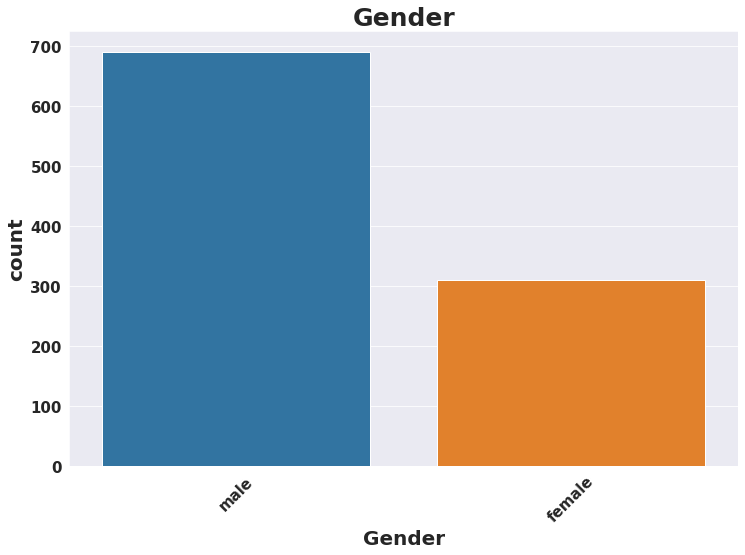

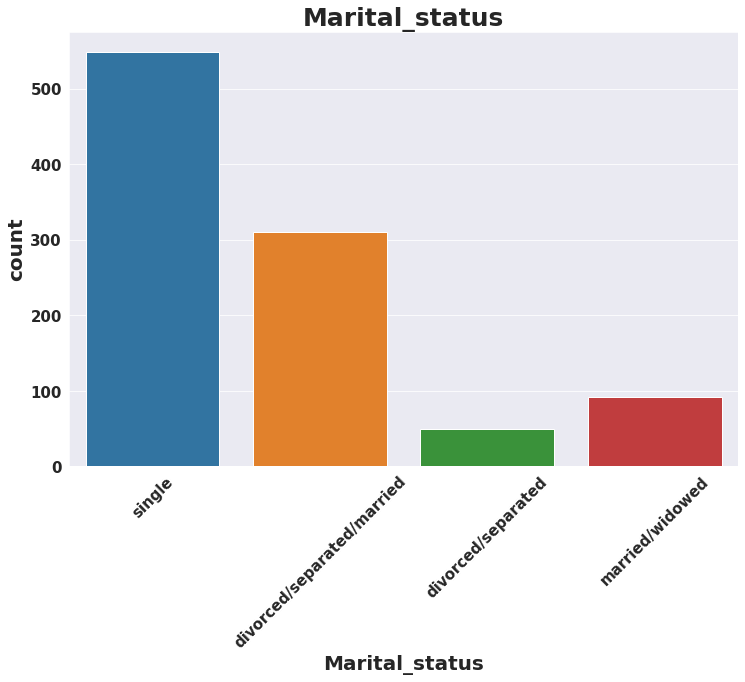

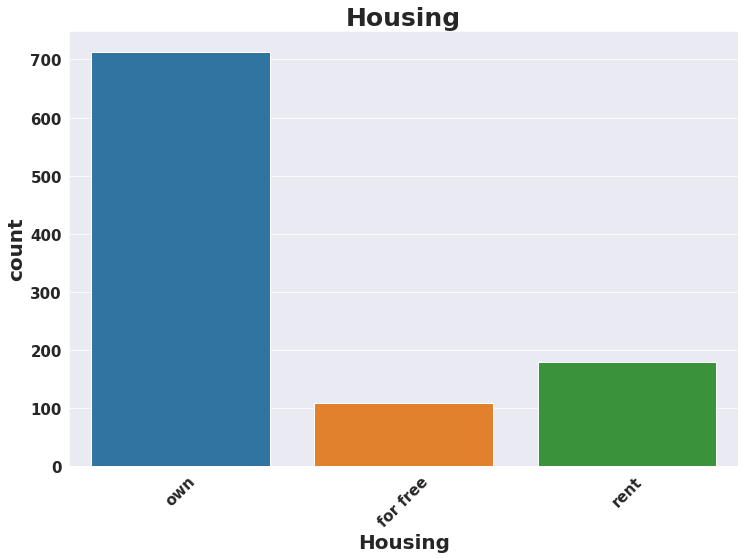

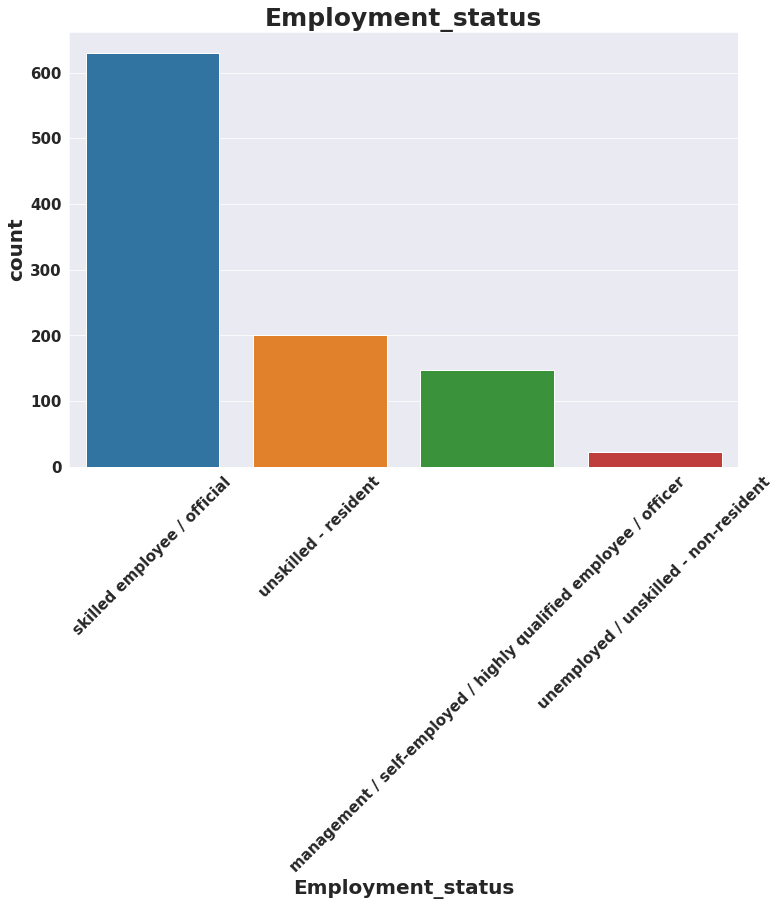

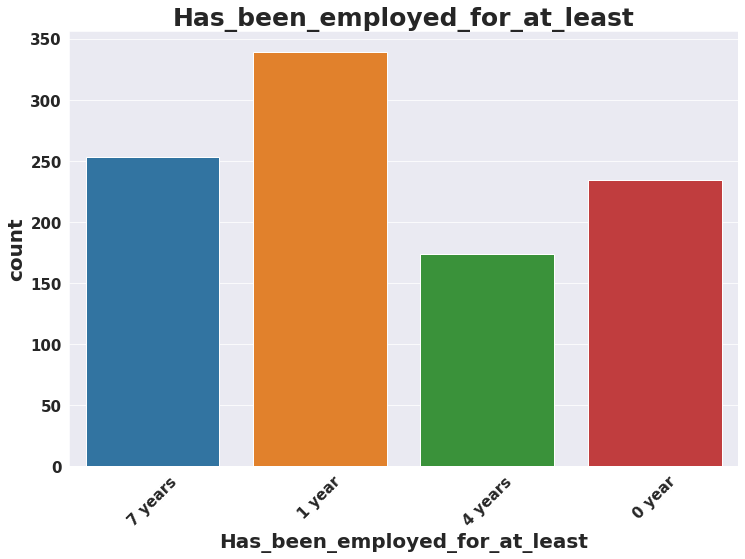

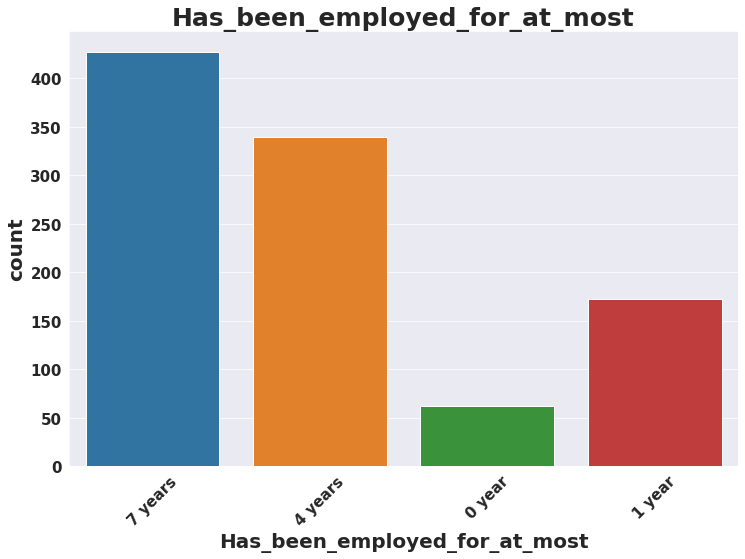

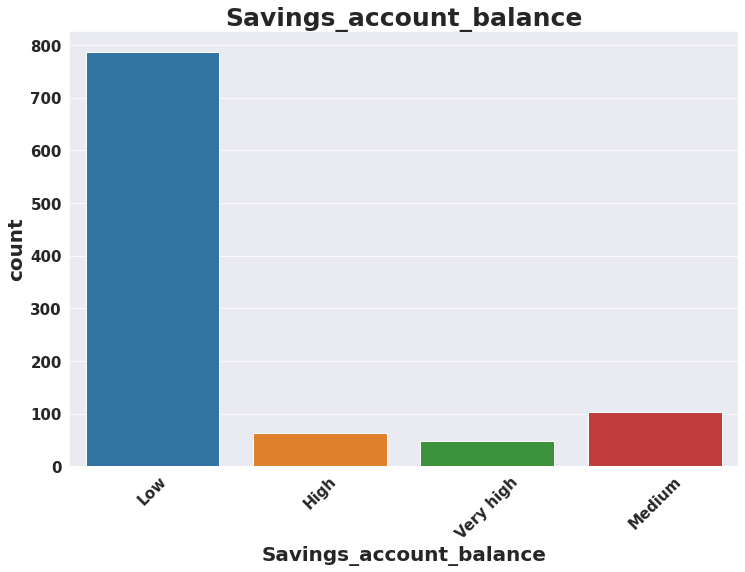

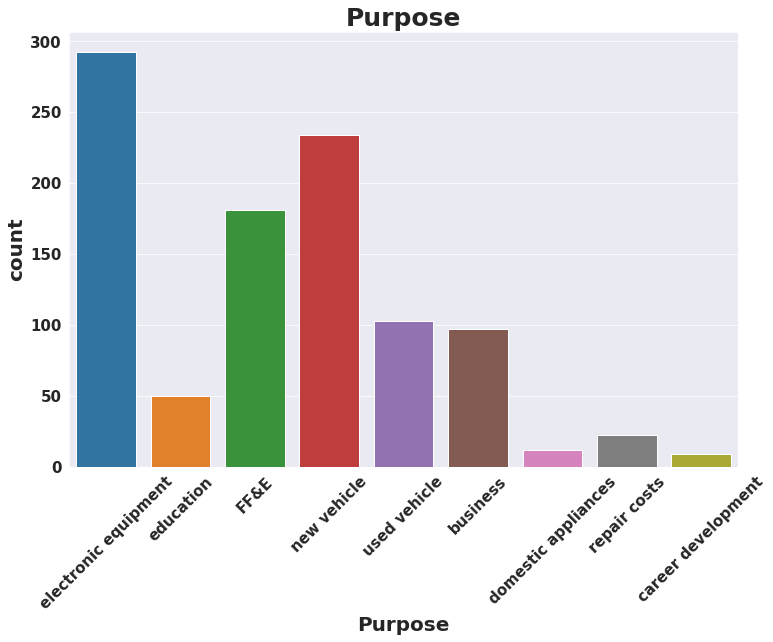

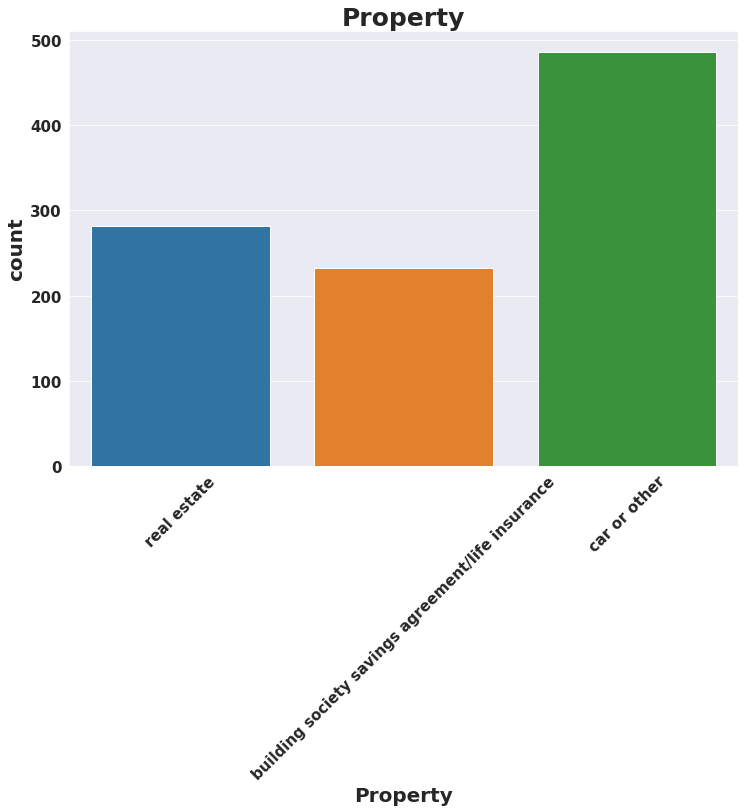

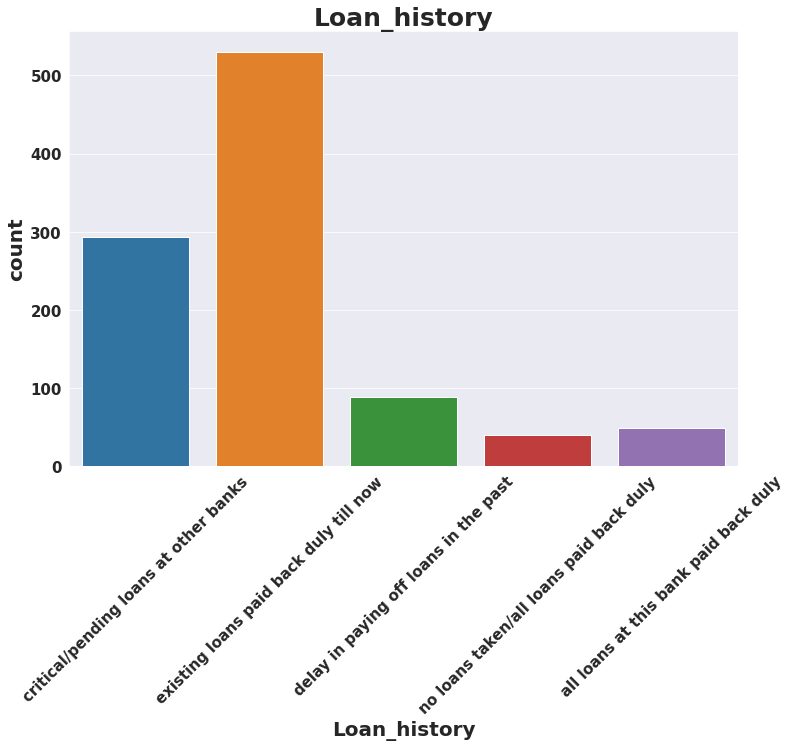

In [37]:
#checking count of each categorical features

#running for loop to plot every category counts,setting figure size,title,xlabel and title
for category in categorical_columns:
  plt.figure(figsize=(12,8))
  sns.countplot(category,data=final_df)
  plt.xlabel(category)
  plt.xticks(rotation=45)
  plt.title(category);

# Inference
1. Male gender have more data in our datset.

2. More single people in our dataset than married/divorces/seperated and have least for divorces/seperated.

3. People own house has more in our dataset than who live in rented house.

4. We have skilled employee/ Officer maximun in our dataset and very low for unemployed/ unskilled & non resident.

5. We have maximum number of people who is employed for at least 1 year and maximum number of people who is employed for maximum for 7 years.

6. Maximum number of people have saving balance account at low category and very low amount of people have either medium, high or very high saving balance account.

7. Purpose of taking a loan in most of the cases is for elctronic equipment, new vehicle or FF&E (Furnitures fixtures and equipment).

8. Maximum number of people who owns some kind of property are for car or other than real estate.

9. In more than 50% of the cases are for existing loans paid back duly till now and less than 5% of the cases are for no loan taken/ all loans paid back duly.

## Relationship between categorical features and label

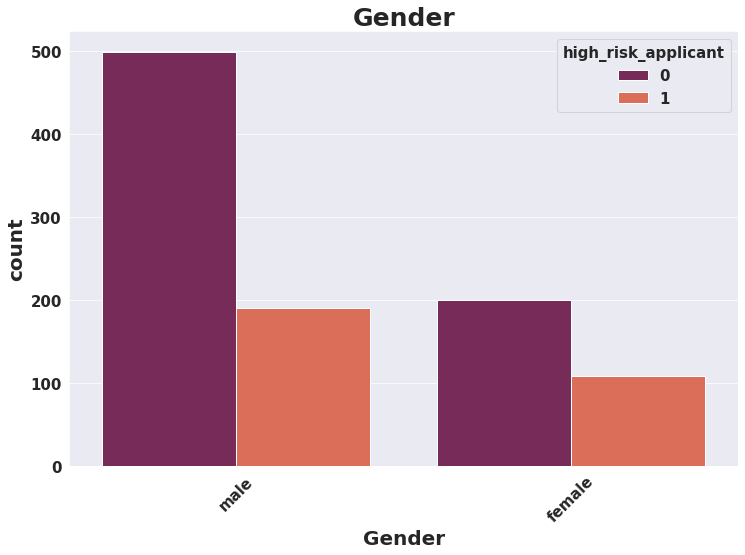

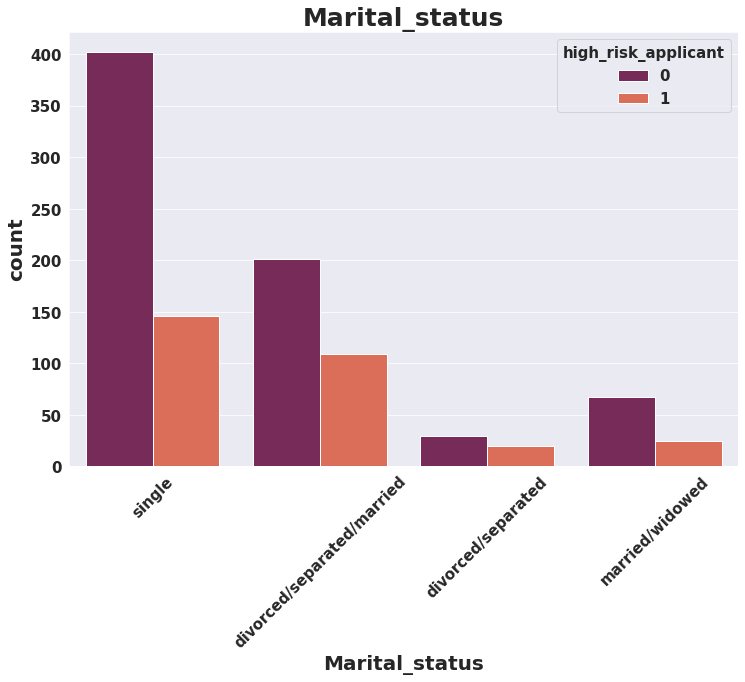

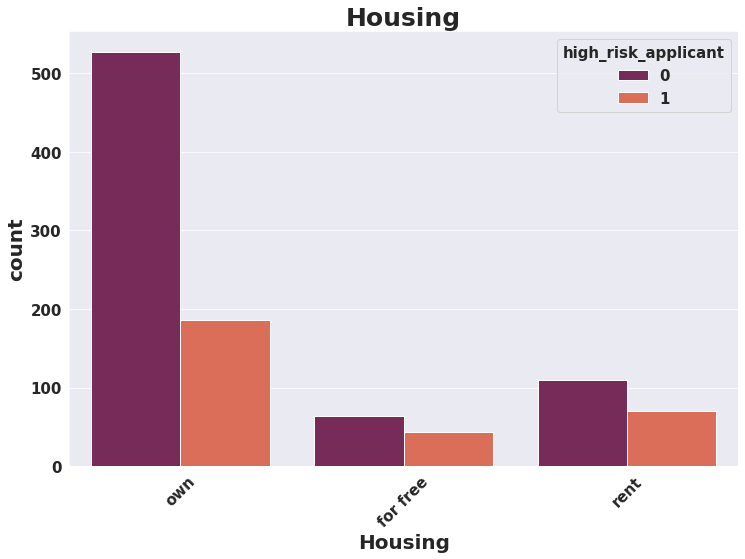

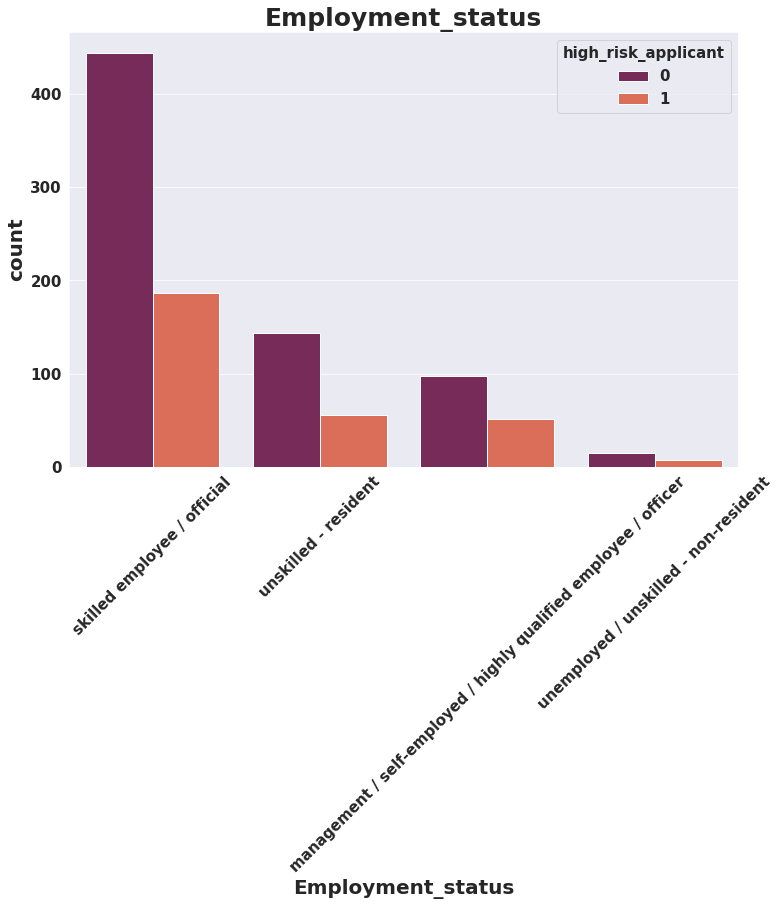

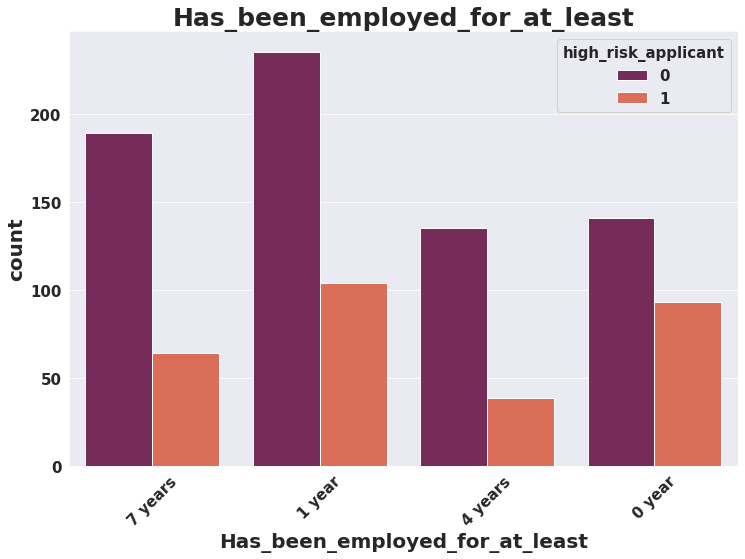

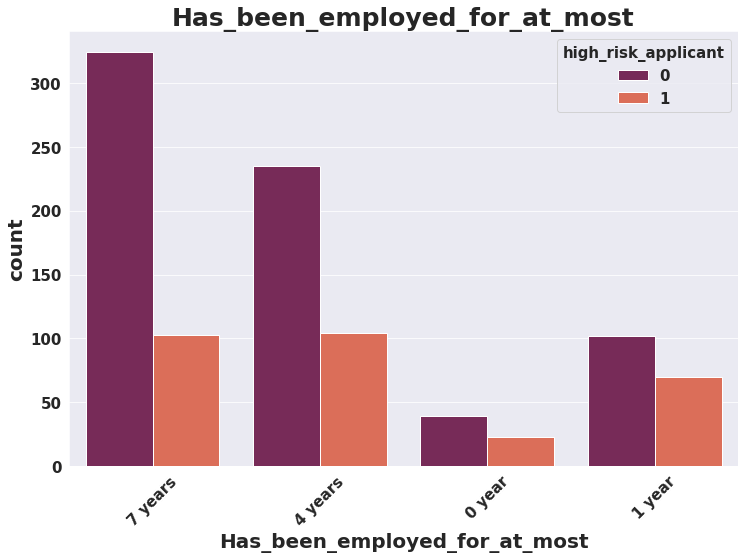

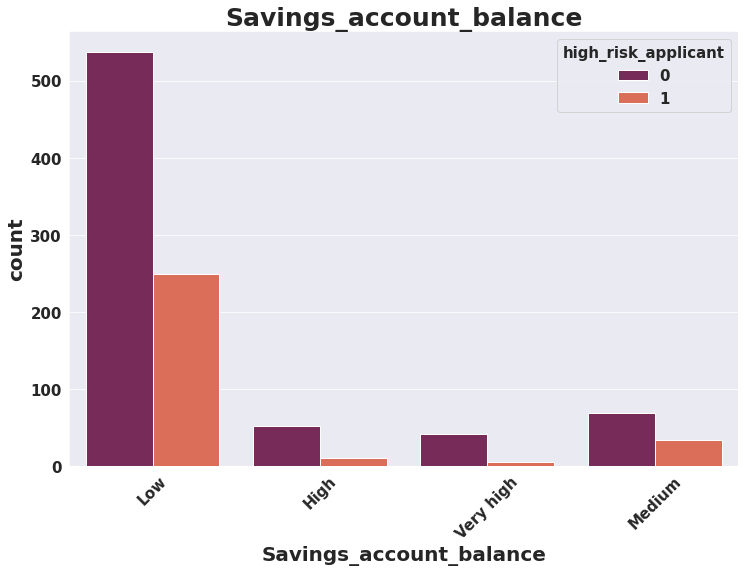

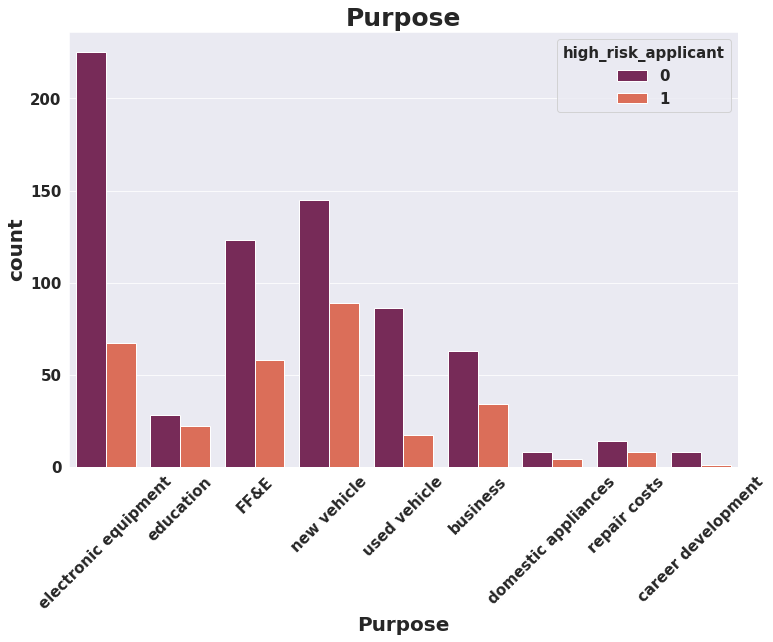

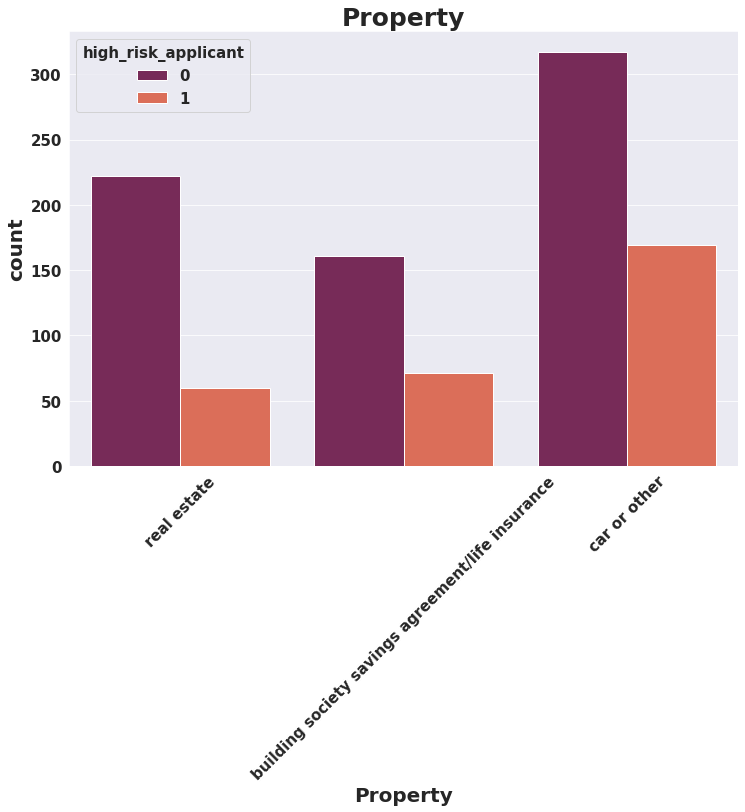

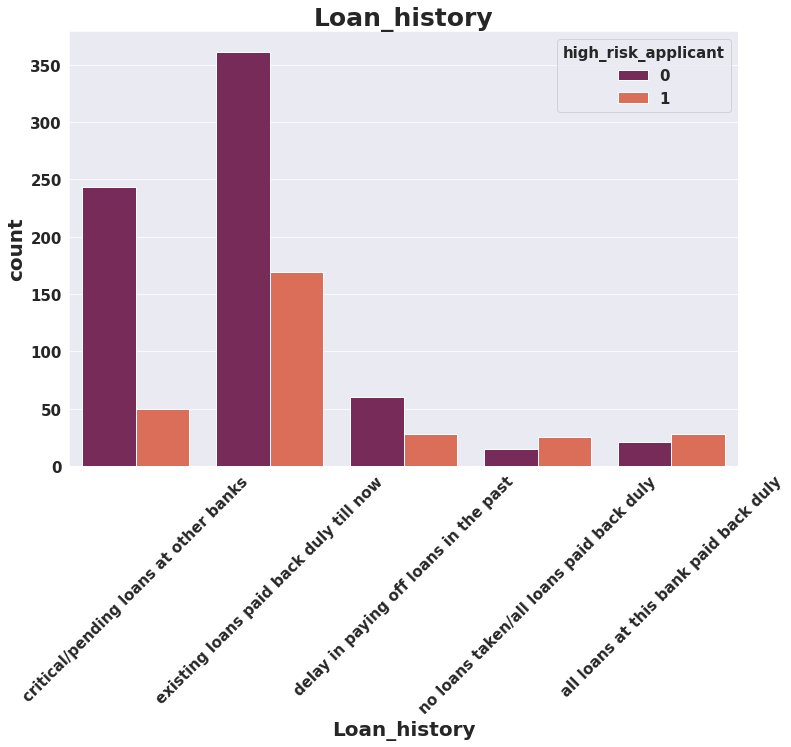

In [38]:
#creating for loop to plot realtion between categorical features and outcome
for cat in categorical_columns:
  plt.figure(figsize=(12,8))
  sns.countplot(cat,hue='high_risk_applicant',data=final_df, palette='rocket')
  plt.xlabel(cat)
  plt.xticks(rotation=45)
  plt.title(cat)

# Inference
1. High risk applicant is comparatively higher for female than male.
2. Seperated/divorced people have comparatively higher risk applicant.
3. People who have housing status free or for rent have comparatively higher risk applicant.
4. People who are employed for 0 or 1 year are comparatively high risk applicant .
5. Pepole who have saving balance account low or medium are comparatively higher risk applicant.
6. Purpose of taking a loan for education or vehicle are comparatively higher risk applicant.
7. People who own car or other property are at little higher risk.

# Exploring Numerical Features

In [39]:
#check numerical columns
numerical_columns = final_df._get_numeric_data()

#drooping label from numerical features
numerical_columns.drop('high_risk_applicant',inplace =True, axis = 1)
numerical_columns

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank
0,67,1,4,1,6,1169000,4,0,0,2
1,22,1,2,1,48,5951000,2,0,0,1
2,49,2,3,1,12,2096000,2,0,0,1
3,45,2,4,1,42,7882000,2,0,1,1
4,53,2,4,1,24,4870000,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...
995,31,1,4,1,12,1736000,3,0,0,1
996,40,1,4,1,30,3857000,4,0,0,1
997,38,1,4,1,12,804000,4,0,0,1
998,23,1,4,1,45,1845000,4,0,0,1


# Distribution of numerical feature

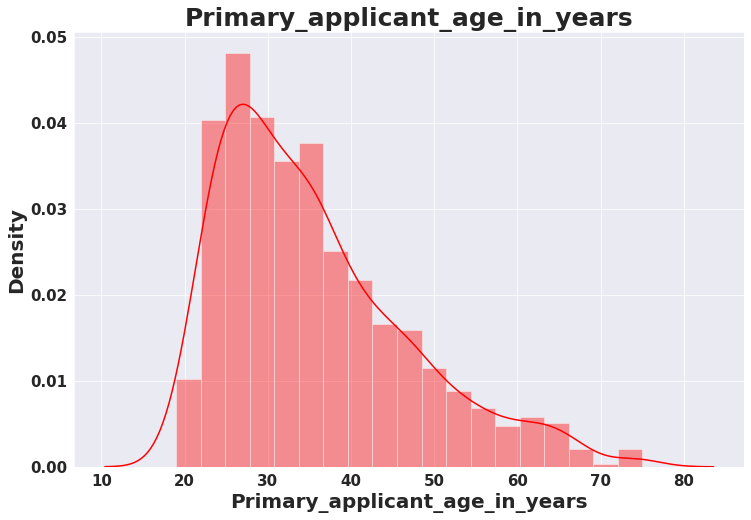

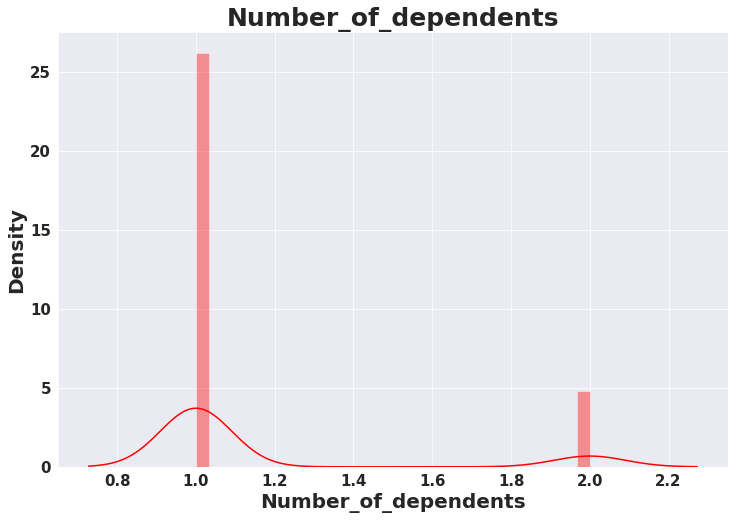

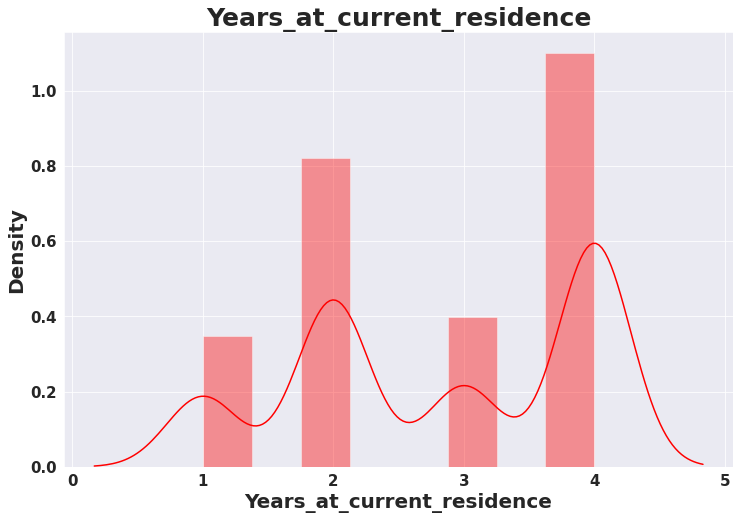

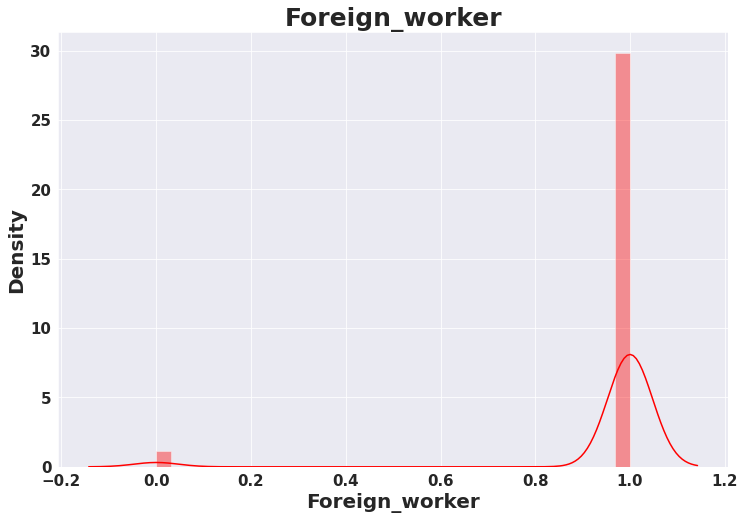

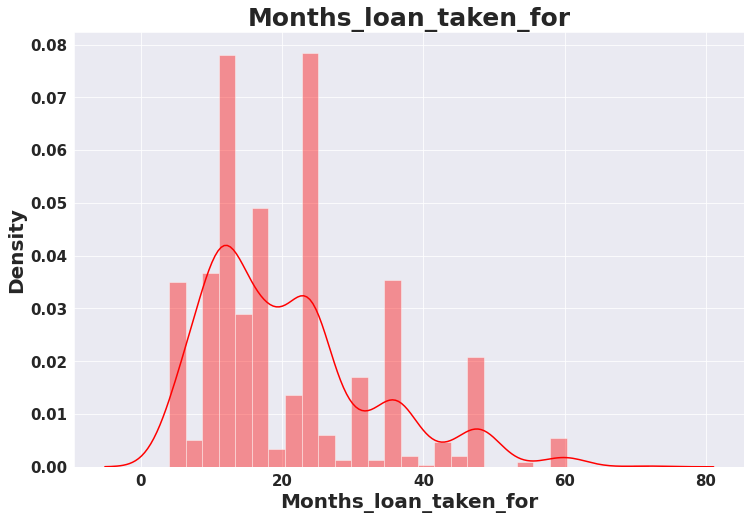

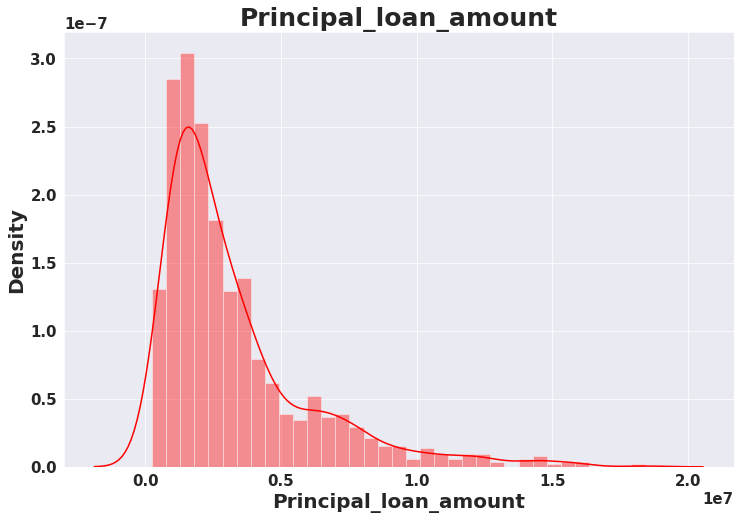

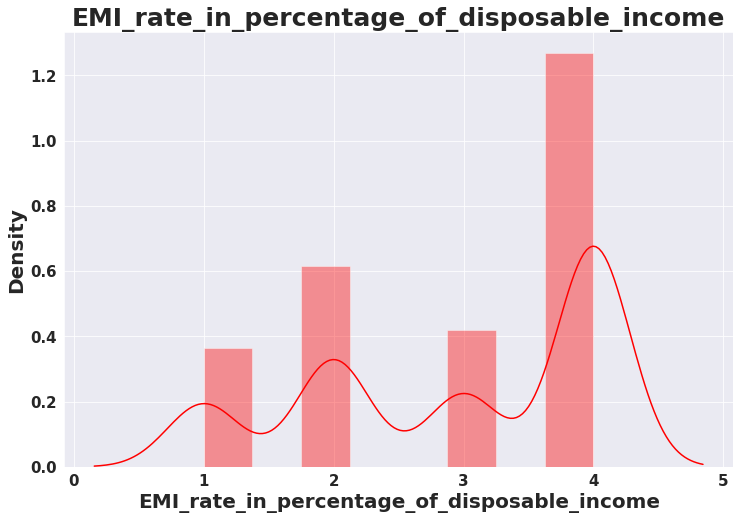

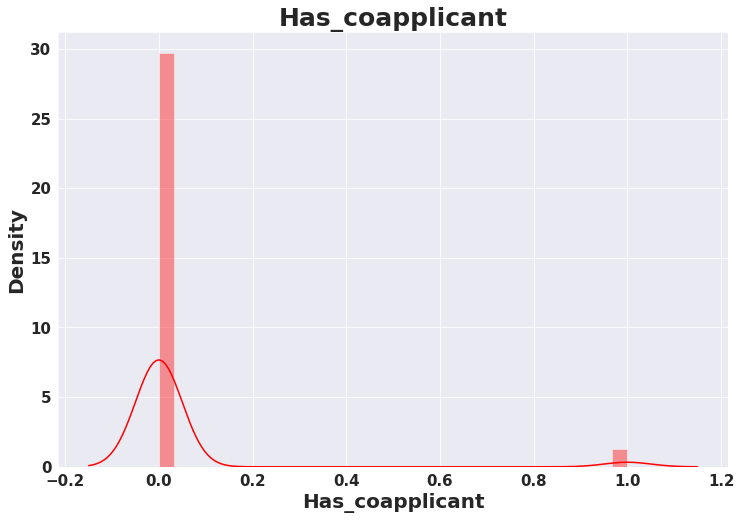

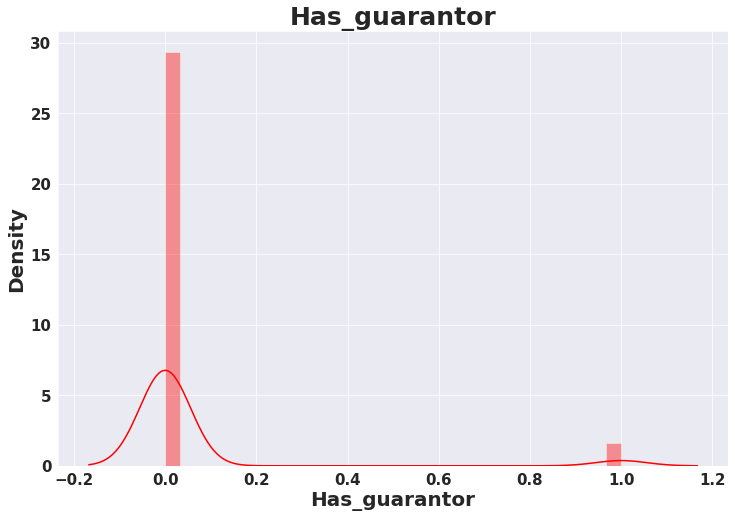

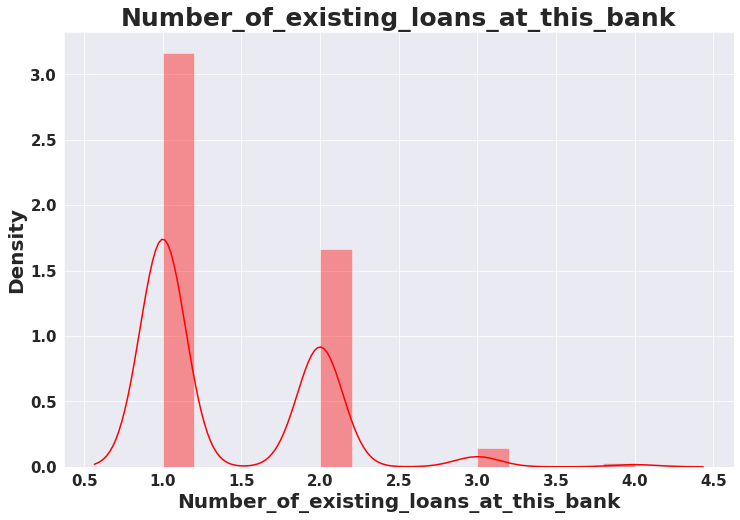

In [40]:
for feature in numerical_columns:
  plt.figure(figsize=(12,8))
  sns.distplot(final_df[feature], color='r')
  plt.xlabel(feature)
  plt.title(feature);

# Inference
1. Age column is right skewed which is also obvious senior people don't take much loan.
2. Months loan taken for is for 10 to 25 month in most of the cases.
3. Number_of_dependents, years_at_current_residence, foreign worker,EMI_rate_percenytage_for_disposable_income,Has_guarantor, has_coapplicant, Number_of_exisiting_loan_at_this_bank is actually has some discrete values, which can be tretaed as an categorical variable for model training and prediction.

# Trend of numerical features with target variable

<Figure size 864x576 with 0 Axes>

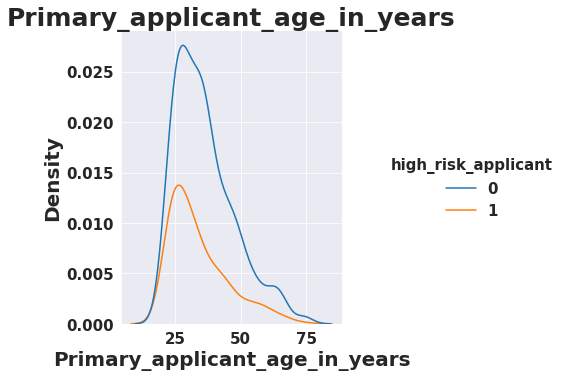

<Figure size 864x576 with 0 Axes>

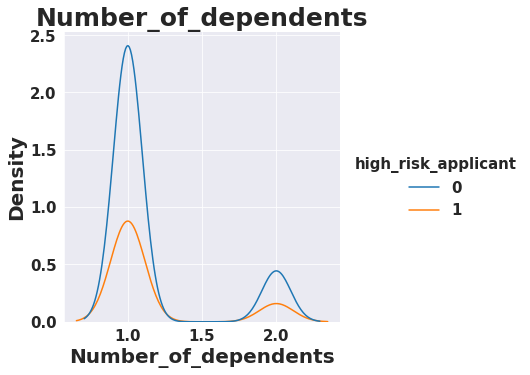

<Figure size 864x576 with 0 Axes>

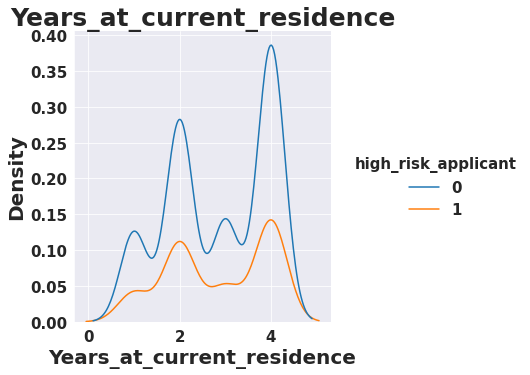

<Figure size 864x576 with 0 Axes>

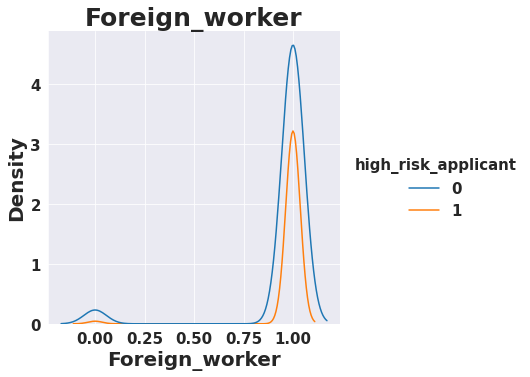

<Figure size 864x576 with 0 Axes>

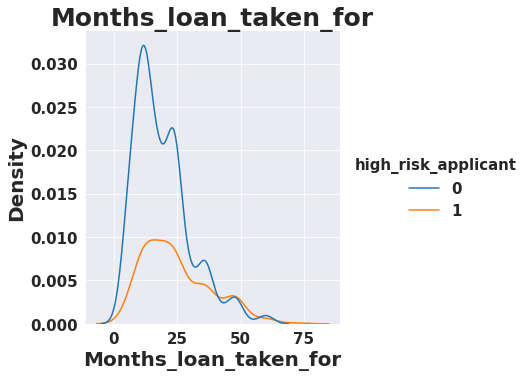

<Figure size 864x576 with 0 Axes>

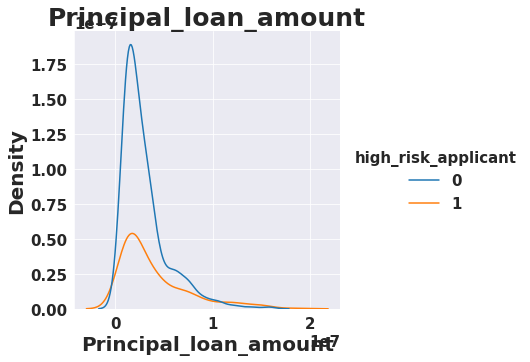

<Figure size 864x576 with 0 Axes>

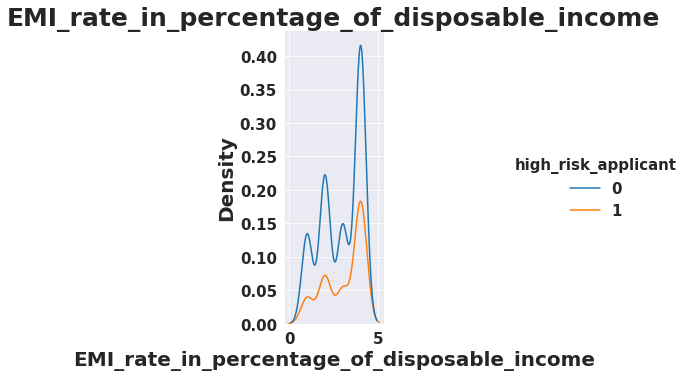

<Figure size 864x576 with 0 Axes>

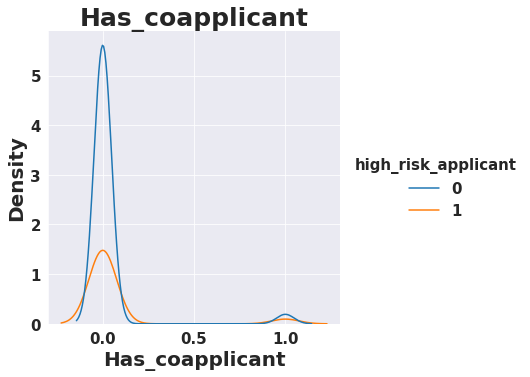

<Figure size 864x576 with 0 Axes>

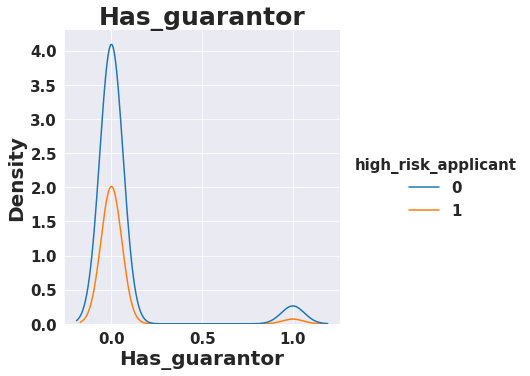

<Figure size 864x576 with 0 Axes>

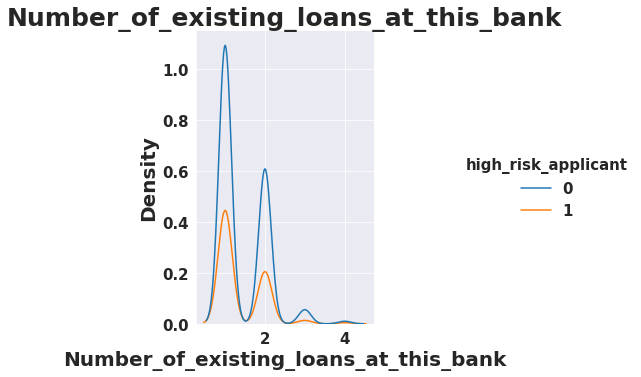

In [41]:
#creating for loop to plot relation between numerical features and label

for feature in numerical_columns:
  plt.figure(figsize=(12,8))
  sns.displot(data=final_df,x=feature,hue='high_risk_applicant',kind='kde')
  plt.xlabel(feature)
  plt.title(feature);

# Inference
1. People who have age between 25-30 are high risk applicant as they have maximum distribution in dataset comoared to other range.
2. Foreign worker are high risk applicant.
people who has taken loan for less than 25 month are at little bit higher risk than others.
3. People who have high EMI rate in percentage are at high risk.
4. People who has no guarantor are high risk applicant.

# Correlation

In [42]:
final_df.corr()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
Primary_applicant_age_in_years,1.000,0.118,0.266,0.006,-0.036,0.033,0.058,-0.018,-0.024,0.149,-0.091
Number_of_dependents,0.118,1.000,0.043,-0.077,-0.024,0.017,-0.071,-0.033,0.037,0.110,-0.003
Years_at_current_residence,0.266,0.043,1.000,0.054,0.034,0.029,0.049,0.002,-0.028,0.090,0.003
Foreign_worker,0.006,-0.077,0.054,1.000,0.138,0.050,0.090,-0.066,-0.097,0.010,0.082
Months_loan_taken_for,-0.036,-0.024,0.034,0.138,1.000,0.625,0.075,0.030,-0.040,-0.011,0.215
Principal_loan_amount,0.033,0.017,0.029,0.050,0.625,1.000,-0.271,0.079,-0.065,0.021,0.155
EMI_rate_in_percentage_of_disposable_income,0.058,-0.071,0.049,0.090,0.075,-0.271,1.000,-0.013,-0.006,0.022,0.072
Has_coapplicant,-0.018,-0.033,0.002,-0.066,0.030,0.079,-0.013,1.000,-0.048,-0.006,0.063
Has_guarantor,-0.024,0.037,-0.028,-0.097,-0.040,-0.065,-0.006,-0.048,1.000,-0.025,-0.055
Number_of_existing_loans_at_this_bank,0.149,0.110,0.090,0.010,-0.011,0.021,0.022,-0.006,-0.025,1.000,-0.046


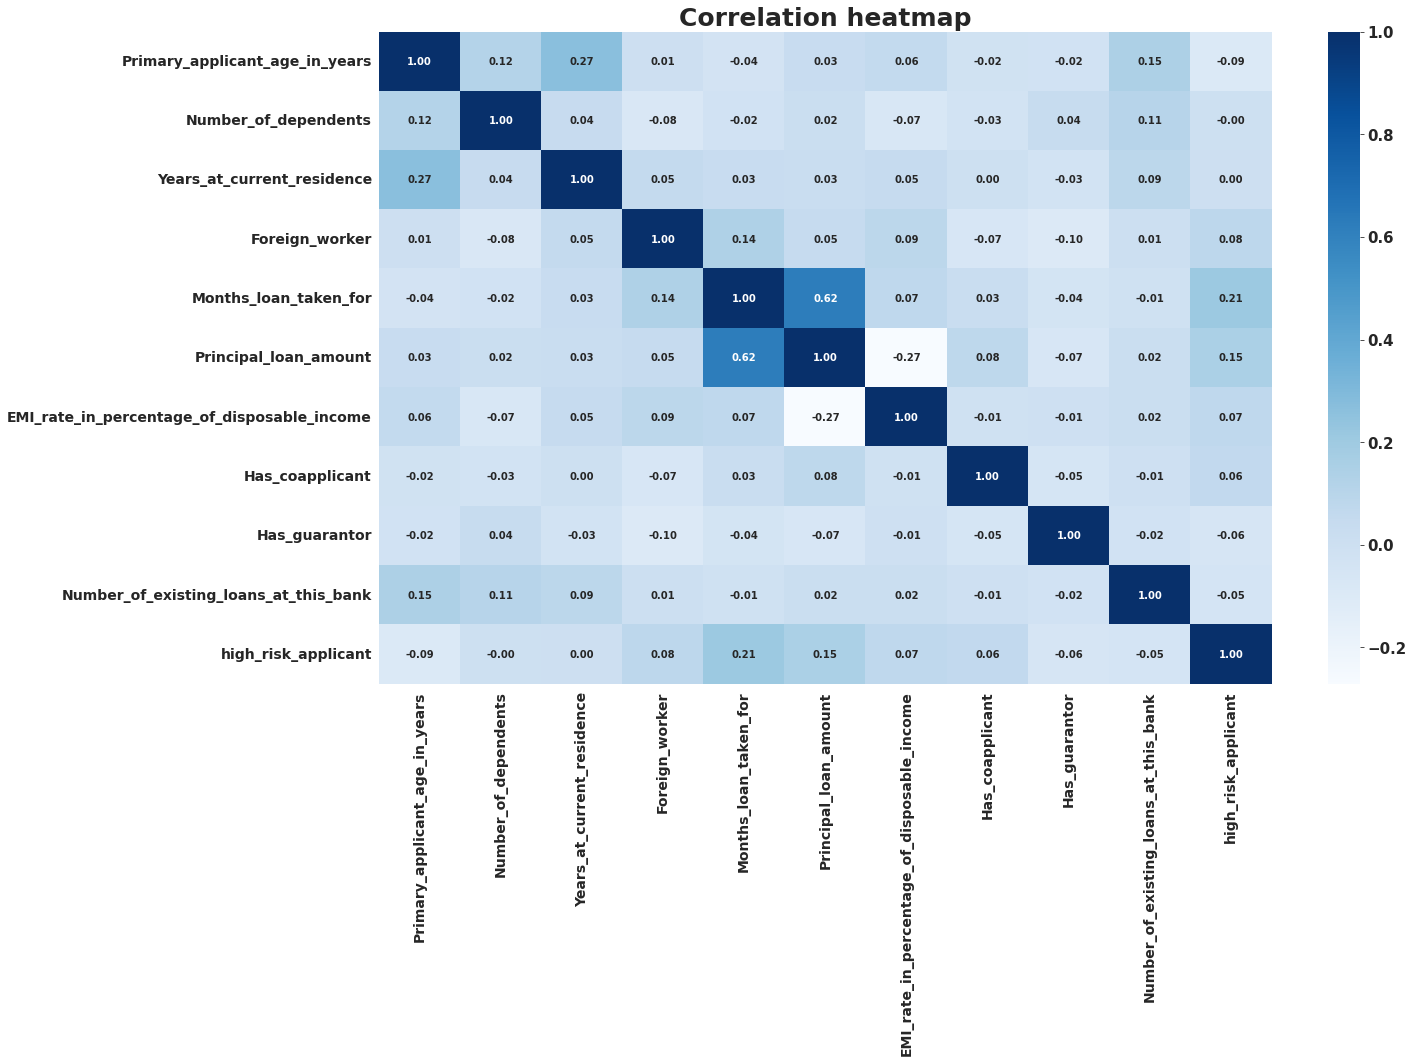

In [43]:
#plotting correlation heatmap
plt.figure(figsize=(20,12))
sns.heatmap(final_df.corr(),annot=True,fmt = '.2f',cmap='Blues')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation heatmap');

1. High_risk_applicant has high positive correlation with months_loan_taken_for, principal_loan_amount.
2. Years_at_current_residance and primary_applicant_age_in_years have high correlation with each other.
3. As we can principal loan amount and for month loan is taken for has higher correlation which is obvious if someone taking high loan amount it will also required more months to repay it.

In [45]:
#extracting cleaned dataframe for model training.
from google.colab import files
final_df.to_csv('df.csv', encoding = 'utf-8-sig') 
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusion-**
1. The dataset is about knowing a person will they do default on loan taken. We had null vaues in few columns we handled them and started our data exploratory analysis.
2. People are aged between 19-75 years.
3. Females are comparatively at higher risk applicant, a well seperated and divorced people.
4. People who are between age 25-30 are high risk applicant and people who are taking loan for education or vehicle purpose are high risk applicant.
5. Foreign worker are most likely to make default also who has no guarantor.
6. People who owned their own house are comparatively low risk applicant.

## Segmenting customer

 We can segment customer based on Houses owned, Employed experience, saving account balance, foreign worker and Guarantor.

I would propose the two segmentation to approve are-:



*   A person with more credit account with more account balance are more creditworthy.
*   Person who owns his house are more creditworthy.


